In [1]:
import pandas as pd
import numpy as np
import datetime
#from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import math as ma
from datetime import datetime, date
warnings.filterwarnings("ignore")

In [2]:
Tran_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheetname='Transactions')  #read excel

In [3]:
Tran_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [4]:
Tran_df=Tran_df.rename(columns=Tran_df.iloc[0]).drop(Tran_df.index[0]) #removing top row

In [5]:
Tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [6]:
Custdemo_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheetname='CustomerDemographic') 

In [7]:
Custdemo_df=Custdemo_df.rename(columns=Custdemo_df.iloc[0]).drop(Custdemo_df.index[0])

In [8]:
Custdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [9]:
Custadd_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheetname='CustomerAddress') 

In [10]:
Custadd_df=Custadd_df.rename(columns=Custadd_df.iloc[0]).drop(Custadd_df.index[0])
Custadd_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
newcust_df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheetname='NewCustomerList')

In [12]:
newcust_df=newcust_df.rename(columns=newcust_df.iloc[0]).drop(newcust_df.index[0])

In [13]:
newcust_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,nan,nan,nan,nan,nan,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312


## Data Cleaning

In [14]:
Custdemo_df.isnull().sum()   #check null count

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [15]:
Custdemo_df["gender"].replace({"F": "Female", "M": "Male","Femal": "Female","U": "Unspecified"}, inplace=True)   #create uniform values

In [16]:
Custdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [17]:
Custdemo_df["gender"].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [18]:
Custdemo_df=Custdemo_df.drop(['default'],axis=1)

In [19]:
Custdemo_df = Custdemo_df.dropna(subset = ['DOB','job_title','job_industry_category'])   #drop na

In [20]:
Custdemo_df.head(50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20
12,12,Sawyere,Flattman,Male,58,1994-07-21 00:00:00,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8
13,13,Gabriele,Norcross,Male,38,1955-02-15 00:00:00,Developer I,Financial Services,High Net Worth,N,Yes,8
14,14,Rayshell,Kitteman,Female,85,1983-03-25 00:00:00,Account Executive,Financial Services,Affluent Customer,N,No,6
15,15,Erroll,Radage,Male,91,2000-07-13 00:00:00,Junior Executive,Manufacturing,Mass Customer,N,No,1
19,19,Sorcha,Keyson,Female,76,2001-04-15 00:00:00,Geological Engineer,Manufacturing,High Net Worth,N,No,1


In [21]:
Custdemo_df.shape

(2865, 12)

In [22]:
Custdemo_df['DOB']= pd.to_datetime(Custdemo_df['DOB'])   #convert DOB to datetime object

In [23]:
import datetime as dt
Custdemo_df['age'] = (pd.to_datetime('now') - Custdemo_df['DOB']).astype('<m8[Y]')   # Derive age fro given date of birth

In [24]:
Custdemo_df['age_bins'] = pd.cut(x=Custdemo_df['age'], bins=[18, 29, 39, 49, 59, 69, 79, 89, 99])

In [25]:
Custdemo_df['age_groups'] = pd.cut(x=Custdemo_df['age'], bins=[18, 29, 39, 49, 59, 69, 79, 89, 99], labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

In [26]:
Custdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_bins,age_groups
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,67.0,"(59, 69]",60-69
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,40.0,"(39, 49]",40-49
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,67.0,"(59, 69]",60-69
9,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,48.0,"(39, 49]",40-49
10,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,32.0,"(29, 39]",30-39


In [27]:
Tran_df["Profit($)"]=Tran_df["list_price"]-Tran_df['standard_cost']  #create new column profit

In [28]:
Tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit($)
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,17.87
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1702.55
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1544.61
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,817.36
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,1055.82


In [29]:
#Convert the below columns to numeric format
Tran_df["Profit($)"] = pd.to_numeric(Tran_df["Profit($)"])
Tran_df["list_price($)"] = pd.to_numeric(Tran_df["list_price"])
Tran_df["standard_cost($)"] = pd.to_numeric(Tran_df["standard_cost"])

In [30]:
Tran_df = Tran_df.dropna(subset = ['online_order','brand'])

In [31]:
Custadd_df['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)  #maintain uniform state value

In [32]:
Custadd_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [33]:
newcust_df['DOB']= pd.to_datetime(newcust_df['DOB'])

In [34]:
newcust_df['age'] = (pd.to_datetime('now') - newcust_df['DOB']).astype('<m8[Y]')    #create age column from DOB

In [35]:
newcust_df['age_bins'] = pd.cut(x=newcust_df['age'], bins=[20, 29, 39, 49, 59, 69, 79, 89, 99])  #create age bins

In [36]:
newcust_df['age_groups'] = pd.cut(x=newcust_df['age'], bins=[18, 29, 39, 49, 59, 69, 79, 89, 99], labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

In [37]:
newcust_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,nan,nan,nan,nan,nan,Rank,Value,age,age_bins,age_groups
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875,64.0,"(59, 69]",60-69
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875,51.0,"(49, 59]",50-59
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875,46.0,"(39, 49]",40-49
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312,42.0,"(39, 49]",40-49
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,0.52,0.5200,0.6500,0.650000,4.0,4,1.70312,55.0,"(49, 59]",50-59


In [41]:
#write dataframes to excel

writer = pd.ExcelWriter('e:\\KPMG.xlsx', engine='xlsxwriter')

newcust_df.to_excel(writer,sheet_name='New_Customers', index = False)
Tran_df.to_excel(writer,sheet_name='Transactions', index = False)
Custdemo_df.to_excel(writer,sheet_name='Customer_Demographic', index = False)

writer.save()

# Exploratory Data Analysis

### Existing old Customers Dataset

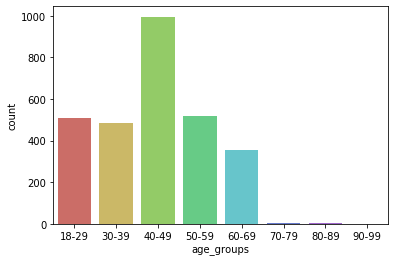

In [83]:
sns.countplot(x='age_groups',data=Custdemo_df,palette='hls')
plt.show()

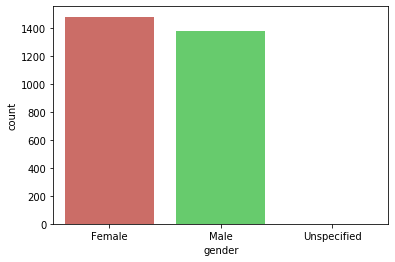

In [34]:
sns.countplot(x='gender',data=Custdemo_df,palette='hls')
plt.show()

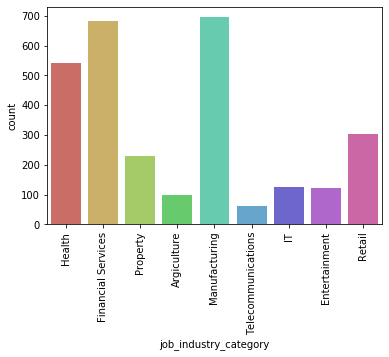

In [35]:
sns.countplot(x='job_industry_category', data= Custdemo_df, palette='hls')
plt.xticks(rotation ='vertical')
plt.show()

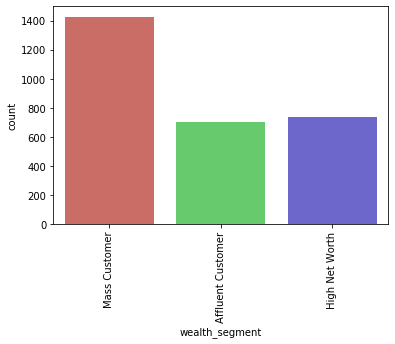

In [36]:
sns.countplot(x='wealth_segment', data= Custdemo_df,palette='hls')
plt.xticks(rotation ='vertical')
plt.show()

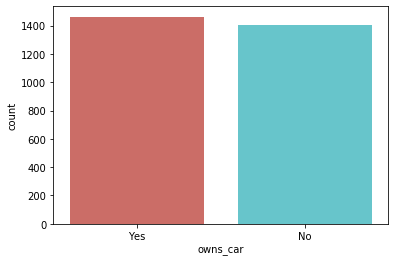

In [37]:
sns.countplot(x='owns_car', data= Custdemo_df,palette='hls')

plt.show()

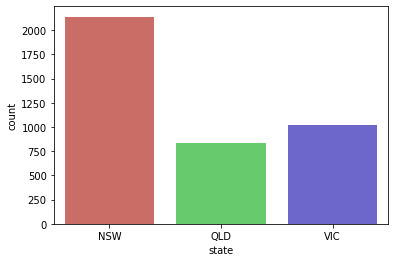

In [38]:
sns.countplot(x='state', data= Custadd_df,palette='hls')
plt.show()

### NewCustomerList Dataset

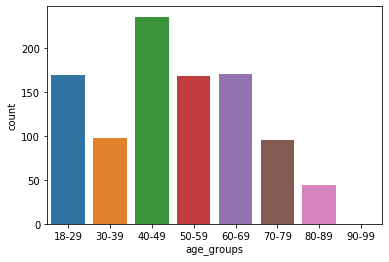

In [85]:
sns.countplot(x='age_groups',data=newcust_df)
plt.show()

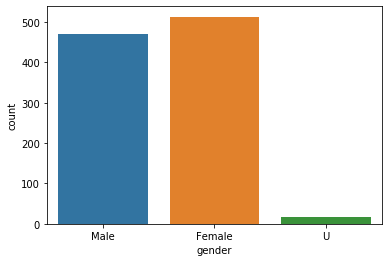

In [39]:
sns.countplot(x='gender',data=newcust_df)
plt.show()

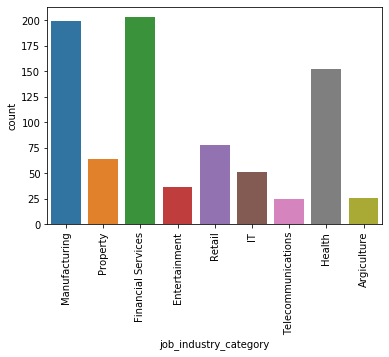

In [40]:
sns.countplot(x='job_industry_category',data=newcust_df)
plt.xticks(rotation ='vertical')
plt.show()

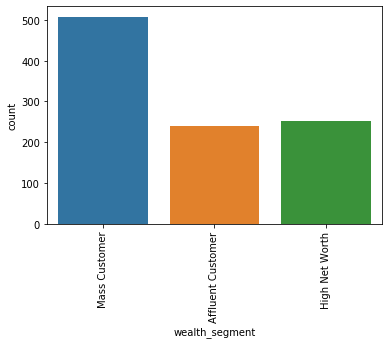

In [41]:
sns.countplot(x='wealth_segment', data= newcust_df)
plt.xticks(rotation ='vertical')
plt.show()

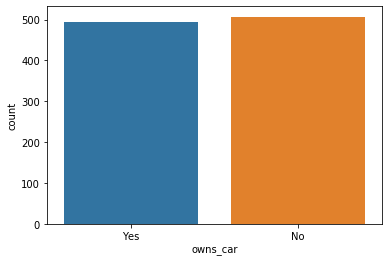

In [42]:
sns.countplot(x='owns_car', data= newcust_df)
plt.show()

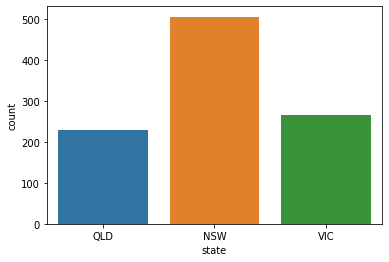

In [43]:
sns.countplot(x='state', data= newcust_df)
plt.show()

### Transactions Dataset

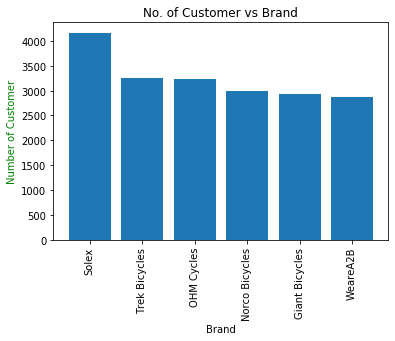

In [44]:

plt.bar(Tran_df.brand.unique(), Tran_df["brand"].value_counts())

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer', color='g')
plt.xlabel('Brand')
plt.title("No. of Customer vs Brand")
plt.show()

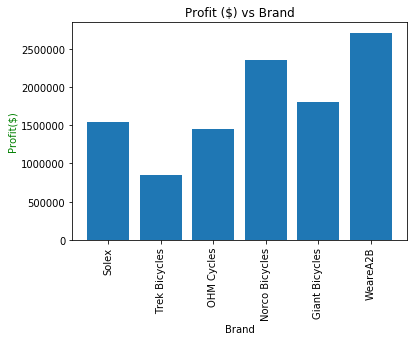

In [45]:
results2 = Tran_df.groupby("brand").sum()
plt.bar(Tran_df.brand.unique(), results2["Profit($)"])

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit($)', color='g')
plt.xlabel('Brand')
plt.title("Profit ($) vs Brand")
plt.show()

We will look on more visual analysis using Visualization tools like Tableau or Power BI

# Data Modelling

Our main aim is to provide recommend which of the customers should be targeted to drive the most value for the organisation.
Hence we need to create a mode that tells us which segmnets customer based on purchases.

### RFM Modelling

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase                  
FREQUENCY (F): Total number of purchases                 
MONETARY VALUE (M): Total money this customer spent.             
We will create those 3 customer attributes for each customer.           

We will use Transaction dataset for this analysis.

In [46]:
Tran_df['transaction_date']=pd.to_datetime(Tran_df['transaction_date'])

In [47]:
Tran_df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [48]:
now = dt.date(2021,7,26)
print(now)

2021-07-26


In [49]:
Tran_df['transaction_date'] = pd.DatetimeIndex(Tran_df['transaction_date']).date

In [50]:
Tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit($),list_price($),standard_cost($)
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,17.87,71.49,53.62
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1702.55,2091.47,388.92
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1544.61,1793.43,248.82
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,817.36,1198.46,381.10
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,1055.82,1765.30,709.48


### Recency

In [51]:
#group by customers and check last date of purshace
recency_df = Tran_df.groupby(by='customer_id', as_index=False)['transaction_date'].max()
recency_df.columns = ['CustomerID','LastPurshaseDate']
recency_df.head()

,CustomerID,LastPurshaseDate
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14


In [52]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaseDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurshaseDate',axis=1,inplace=True)

In [53]:
recency_df.head()

,CustomerID,Recency
0,1,1311
1,2,1432
2,3,1406
3,4,1499
4,5,1320


### Frequency

In [54]:
# drop duplicates
#Tran_df_copy = Tran_df
#Tran_df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = Tran_df.groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,1,11
1,2,3
2,3,7
3,4,2
4,5,6


### Monetary

In [55]:
monetary_df = Tran_df.groupby(by='customer_id',as_index=False).agg({'list_price': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1,9084.45
1,2,4149.07
2,3,9525.22
3,4,1047.72
4,5,5903.20


### RFM Table

In [56]:
#merge three df's

temp_df = recency_df.merge(frequency_df,on='CustomerID')    
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,1,1311,11,9084.45
1,2,1432,3,4149.07
2,3,1406,7,9525.22
3,4,1499,2,1047.72
4,5,1320,6,5903.20


From above table we come to know that the ideal customer for the company should have lower recency value and More Frequency and Monetory value.
As this types of customers brings more profit to the company as they are quit active customers who purchases more often that too with high money spent.

Now, We will create a RFM score which will give score 1 to 4 where 4 is best and 1 is worst. This will help us to segment so that we can target the similar customers.

### RFM Quartiles

In [57]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,875.75,1322.0,4.0,4049.8100
0.50,1749.50,1349.0,5.0,5868.1850
0.75,2623.25,1392.0,7.0,8008.9225


In [58]:
quantiles.to_dict()

{'CustomerID': {0.25: 875.75, 0.5: 1749.5, 0.75: 2623.25},
 'Recency': {0.25: 1322.0, 0.5: 1349.0, 0.75: 1392.0},
 'Frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'Monetary': {0.25: 4049.81, 0.5: 5868.1849999999995, 0.75: 8008.922500000001}}

### RFM Segments

In [59]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [60]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [61]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,1,1311,11,9084.45,4,4,4
1,2,1432,3,4149.07,1,1,2
2,3,1406,7,9525.22,1,3,4
3,4,1499,2,1047.72,1,1,1
4,5,1320,6,5903.20,4,3,3


In [62]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,1311,11,9084.45,4,4,4,444
1,2,1432,3,4149.07,1,1,2,112
2,3,1406,7,9525.22,1,3,4,134
3,4,1499,2,1047.72,1,1,1,111
4,5,1320,6,5903.20,4,3,3,433


### Best 10 Existing Customers

In [63]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
2178,2183,1312,14,19071.32,4,4,4,444
1314,1317,1314,9,15370.81,4,4,4,444
1326,1329,1308,11,14818.12,4,4,4,444
321,322,1305,11,14770.22,4,4,4,444
1456,1460,1316,8,14633.24,4,4,4,444
2471,2476,1318,14,14578.69,4,4,4,444
2459,2464,1306,13,14574.06,4,4,4,444
798,799,1314,11,14399.89,4,4,4,444
1073,1076,1313,12,14390.10,4,4,4,444
1065,1068,1308,14,14254.55,4,4,4,444
